In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import math

In [2]:
df_fin = pd.read_csv('data-final.csv', encoding = "UTF-8")

C:\Users\margu\anaconda3\envs\case_1.2_var2\lib\site-packages\IPython\core\interactiveshell.py:3062: DtypeWarning: Columns (9,11,12,30,33,34,40,45,48,58,59,60) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df_fin.head(-5)

,Unnamed: 0,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,...,MOD_COMPETEN_CIUDADA_PNAL,MOD_INGLES_PUNT,MOD_INGLES_DESEM,MOD_INGLES_PNAL,MOD_COMUNI_ESCRITA_PUNT,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,ESTU_ESTADOINVESTIGACION,PERIODO-X,PRUEBA
0,0,CC,1 COLOMBIA,F,24/11/1994,20163,EK201630197609,ESTUDIANTE,CUNDINAMARCA,25,...,78.0,155.0,A2,62.0,151,3,43,PUBLICAR,2016,SaberPro
1,1,CC,1 COLOMBIA,M,11/06/1991,20163,EK201630241417,ESTUDIANTE,BOGOTA,11,...,88.0,153.0,A2,59.0,220,4,100,PUBLICAR,2016,SaberPro
2,2,CC,1 COLOMBIA,F,22/02/1995,20163,EK201630080363,ESTUDIANTE,NORTE SANTANDER,54,...,25.0,120.0,-A1,16.0,162,3,72,PUBLICAR,2016,SaberPro
3,3,CC,1 COLOMBIA,M,01/08/1994,20163,EK201630081694,ESTUDIANTE,BOGOTA,11,...,82.0,214.0,B2,98.0,112,1,8,PUBLICAR,2016,SaberPro
4,4,CC,1 COLOMBIA,M,18/08/1980,20163,EK201630079620,ESTUDIANTE,BOLIVAR,13,...,77.0,184.0,B1,84.0,158,3,53,PUBLICAR,2016,SaberPro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1635905,76344,CC,COLOMBIA,M,02/13/1997 12:00:00 AM,20195,EK201950042735,ESTUDIANTE,BOYACA,15,...,6.0,109.0,A2,67.0,108,3,64,PUBLICAR,20192,SaberTyT
1635906,76345,CC,COLOMBIA,M,04/29/1997 12:00:00 AM,20195,EK201950043029,ESTUDIANTE,BOYACA,15,...,26.0,100.0,A1,52.0,156,4,98,PUBLICAR,20192,SaberTyT
1635907,76346,CC,COLOMBIA,M,01/26/1994 12:00:00 AM,20195,EK201950043699,ESTUDIANTE,BOYACA,15,...,84.0,112.0,A2,72.0,111,3,70,PUBLICAR,20192,SaberTyT
1635908,76347,CC,COLOMBIA,M,05/28/1996 12:00:00 AM,20195,EK201950042257,ESTUDIANTE,BOYACA,15,...,80.0,96.0,A1,45.0,72,1,6,PUBLICAR,20192,SaberTyT


In [4]:
df_fin.columns

Index(['Unnamed: 0', 'ESTU_TIPODOCUMENTO', 'ESTU_NACIONALIDAD', 'ESTU_GENERO',
       'ESTU_FECHANACIMIENTO', 'PERIODO', 'ESTU_CONSECUTIVO',
       'ESTU_ESTUDIANTE', 'ESTU_DEPTO_RESIDE', 'ESTU_COD_RESIDE_DEPTO',
       'ESTU_MCPIO_RESIDE', 'ESTU_COD_RESIDE_MCPIO', 'ESTU_COLE_TERMINO',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_PAGOMATRICULABECA',
       'ESTU_PAGOMATRICULACREDITO', 'ESTU_PAGOMATRICULAPADRES',
       'ESTU_PAGOMATRICULAPROPIO', 'ESTU_SIMULACROTIPOICFES',
       'ESTU_ACTIVIDADREFUERZOAREAS', 'ESTU_ACTIVIDADREFUERZOGENERIC',
       'ESTU_TIPODOCUMENTOSB11', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_TIENECOMPUTADOR',
       'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL', 'ESTU_HORASSEMANATRABAJA',
       'INST_COD_INSTITUCION', 'INST_NOMBRE_INSTITUCION',
       'ESTU_PRGM_ACADEMICO', 'ESTU_SNIES_PRGMACADEMICO',
       'ESTU_PRGM_CODMUNICIPIO', 'ESTU_PRGM_MUNICIPIO',
       'ESTU_PRGM_DEPARTAMENTO', 'ESTU_NIV

In [5]:
demog_cols = ['ESTU_TIPODOCUMENTO', 'ESTU_NACIONALIDAD', 'ESTU_GENERO',
    'ESTU_FECHANACIMIENTO', 'PERIODO', 'ESTU_CONSECUTIVO',
    'ESTU_ESTUDIANTE', 'ESTU_DEPTO_RESIDE', 'ESTU_COD_RESIDE_DEPTO',
    'ESTU_MCPIO_RESIDE', 'ESTU_COD_RESIDE_MCPIO', 'ESTU_COLE_TERMINO',
    'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_PAGOMATRICULABECA',
    'ESTU_PAGOMATRICULACREDITO', 'ESTU_PAGOMATRICULAPADRES',
    'ESTU_PAGOMATRICULAPROPIO', 'ESTU_SIMULACROTIPOICFES',
    'ESTU_ACTIVIDADREFUERZOAREAS', 'ESTU_ACTIVIDADREFUERZOGENERIC',
    'ESTU_TIPODOCUMENTOSB11', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE',
    'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_TIENECOMPUTADOR',
    'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL', 'ESTU_HORASSEMANATRABAJA']

ies_cols=['INST_COD_INSTITUCION', 'INST_NOMBRE_INSTITUCION',
       'ESTU_PRGM_ACADEMICO', 'ESTU_SNIES_PRGMACADEMICO',
       'ESTU_PRGM_CODMUNICIPIO', 'ESTU_PRGM_MUNICIPIO',
       'ESTU_PRGM_DEPARTAMENTO', 'ESTU_NIVEL_PRGM_ACADEMICO',
       'ESTU_METODO_PRGM', 'ESTU_NUCLEO_PREGRADO', 'ESTU_INST_CODMUNICIPIO',
       'ESTU_INST_MUNICIPIO', 'ESTU_INST_DEPARTAMENTO',
       'INST_CARACTER_ACADEMICO', 'INST_ORIGEN', 'ESTU_COD_MCPIO_PRESENTACION',
       'ESTU_MCPIO_PRESENTACION', 'ESTU_DEPTO_PRESENTACION',
       'ESTU_COD_DEPTO_PRESENTACION']

result_cols=['MOD_RAZONA_CUANTITAT_PUNT',
       'MOD_RAZONA_CUANTITATIVO_PNAL', 'MOD_LECTURA_CRITICA_PUNT',
       'MOD_LECTURA_CRITICA_PNAL', 'MOD_COMPETEN_CIUDADA_PUNT',
       'MOD_COMPETEN_CIUDADA_PNAL', 'MOD_INGLES_PUNT', 'MOD_INGLES_DESEM',
       'MOD_INGLES_PNAL', 'MOD_COMUNI_ESCRITA_PUNT',
       'MOD_COMUNI_ESCRITA_DESEM', 'MOD_COMUNI_ESCRITA_PNAL']

others_cols=[ 'PRUEBA','PERIODO-X']
columns=others_cols+ies_cols+result_cols

In [6]:
df_ies=df_fin[columns].copy()
df_ies.head()

,PRUEBA,PERIODO-X,INST_COD_INSTITUCION,INST_NOMBRE_INSTITUCION,ESTU_PRGM_ACADEMICO,ESTU_SNIES_PRGMACADEMICO,ESTU_PRGM_CODMUNICIPIO,ESTU_PRGM_MUNICIPIO,ESTU_PRGM_DEPARTAMENTO,ESTU_NIVEL_PRGM_ACADEMICO,...,MOD_LECTURA_CRITICA_PUNT,MOD_LECTURA_CRITICA_PNAL,MOD_COMPETEN_CIUDADA_PUNT,MOD_COMPETEN_CIUDADA_PNAL,MOD_INGLES_PUNT,MOD_INGLES_DESEM,MOD_INGLES_PNAL,MOD_COMUNI_ESCRITA_PUNT,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL
0,SaberPro,2016,2829,CORPORACION UNIVERSITARIA MINUTO DE DIOS -UNIM...,ADMINISTRACIÓN EN SALUD OCUPACIONAL,91236,11001,BOGOTÁ D.C.,BOGOTA,UNIVERSITARIO,...,170.0,74.0,175.0,78.0,155.0,A2,62.0,151,3,43
1,SaberPro,2016,2719,FUNDACION UNIVERSITARIA LUIS AMIGO FUNLAM-MEDE...,PSICOLOGIA,51788,11001,BOGOTÁ D.C.,BOGOTA,UNIVERSITARIO,...,179.0,83.0,185.0,88.0,153.0,A2,59.0,220,4,100
2,SaberPro,2016,1209,UNIVERSIDAD FRANCISCO DE PAULA SANTANDER-CUCUTA,ENFERMERIA,852,54001,CUCUTA,NORTE SANTANDER,UNIVERSITARIO,...,156.0,58.0,129.0,25.0,120.0,-A1,16.0,162,3,72
3,SaberPro,2016,1813,UNIVERSIDAD DE LOS ANDES-BOGOTÁ D.C.,INGENIERIA QUIMICA,4017,11001,BOGOTÁ D.C.,BOGOTA,UNIVERSITARIO,...,168.0,72.0,178.0,82.0,214.0,B2,98.0,112,1,8
4,SaberPro,2016,9105,ESCUELA NAVAL DE CADETESALMIRANTE PADILLA-CART...,ADMINISTRACION,4057,13001,CARTAGENA,BOLIVAR,UNIVERSITARIO,...,163.0,66.0,173.0,77.0,184.0,B1,84.0,158,3,53


In [7]:
df_ies.groupby(['PRUEBA', 'PERIODO-X']).size()

PRUEBA    PERIODO-X
SaberPro  2016         242629
          2017         245593
          2018         237112
          2019         260756
SaberTyT  20161        112504
          20162         53041
          20171         92961
          20172         75575
          20181         77026
          20182         61108
          20191        101256
          20192         76354
dtype: int64

In [8]:
for column in (ies_cols):
    print(f'Column: {column}')
    print(df_ies[column].astype(str).sort_values().value_counts())
    print('\n')

Column: INST_COD_INSTITUCION
9110       351832
2829        56089
4813        46269
2725        30626
2102        22004
            ...  
1909.0          1
24588.0         1
7336.0          1
1222            1
10041.0         1
Name: INST_COD_INSTITUCION, Length: 728, dtype: int64


Column: INST_NOMBRE_INSTITUCION
SERVICIO NACIONAL DE APRENDIZAJE-SENA                                                              283859
CORPORACION UNIVERSITARIA MINUTO DE DIOS -UNIMINUTO-BOGOTÁ D.C.                                     73135
SERVICIO NACIONAL DE APRENDIZAJE-SENA-BOGOTÁ D.C.                                                   67973
CORPORACION UNIFICADA NACIONAL DE EDUCACION SUPERIOR-CUN-BOGOTÁ D.C.                                50757
POLITECNICO GRANCOLOMBIANO-BOGOTÁ D.C.                                                              37075
                                                                                                    ...  
ESCUELA DE SUBOFICIALES DE LA FUERZA AEREA COLOMB

BOGOTA                     339513
ANTIOQUIA                  202610
VALLE                      135865
BOGOTÁ                     120389
ATLANTICO                   95692
                            ...  
AUCKLAND                        7
EL CAIRO                        6
TEL AVIV                        5
SAN JUAN DE PUERTO RICO         2
LA HABANA                       1
Name: ESTU_DEPTO_PRESENTACION, Length: 77, dtype: int64


Column: ESTU_COD_DEPTO_PRESENTACION
11.0    246113
11      213789
5.0     114700
5        87910
76.0     78851
         ...  
97.0       165
97         132
99          99
94          94
nan         28
Name: ESTU_COD_DEPTO_PRESENTACION, Length: 70, dtype: int64




In [9]:
df_ies['ESTU_PRGM_MUNICIPIO']=df_ies.ESTU_PRGM_MUNICIPIO.replace('BOGOTÁ D.C.', 'BOGOTA')
df_ies['ESTU_PRGM_MUNICIPIO']=df_ies.ESTU_PRGM_MUNICIPIO.replace('BOGOTÁ, D.C.', 'BOGOTA')

df_ies['ESTU_PRGM_DEPARTAMENTO']=df_ies.ESTU_PRGM_DEPARTAMENTO.replace('BOGOTÁ', 'BOGOTA')

df_ies['ESTU_INST_MUNICIPIO']=df_ies.ESTU_INST_MUNICIPIO.replace('BOGOTÁ D.C.', 'BOGOTA')
df_ies['ESTU_INST_MUNICIPIO']=df_ies.ESTU_INST_MUNICIPIO.replace('BOGOTÁ, D.C.', 'BOGOTA')

df_ies['ESTU_INST_DEPARTAMENTO']=df_ies.ESTU_INST_DEPARTAMENTO.replace('BOGOTÁ', 'BOGOTA')

df_ies['ESTU_MCPIO_PRESENTACION']=df_ies.ESTU_MCPIO_PRESENTACION.replace('BOGOTÁ D.C.', 'BOGOTA')
df_ies['ESTU_MCPIO_PRESENTACION']=df_ies.ESTU_MCPIO_PRESENTACION.replace('BOGOTÁ, D.C.', 'BOGOTA')

df_ies['ESTU_DEPTO_PRESENTACION']=df_ies.ESTU_DEPTO_PRESENTACION.replace('BOGOTÁ', 'BOGOTA')

In [10]:
for column in (ies_cols):
    print(f'Column: {column}')
    print(df_ies[column].astype(str).sort_values().value_counts())
    print('\n')

Column: INST_COD_INSTITUCION
9110       351832
2829        56089
4813        46269
2725        30626
2102        22004
            ...  
1909.0          1
24588.0         1
7336.0          1
1222            1
10041.0         1
Name: INST_COD_INSTITUCION, Length: 728, dtype: int64


Column: INST_NOMBRE_INSTITUCION
SERVICIO NACIONAL DE APRENDIZAJE-SENA                                                              283859
CORPORACION UNIVERSITARIA MINUTO DE DIOS -UNIMINUTO-BOGOTÁ D.C.                                     73135
SERVICIO NACIONAL DE APRENDIZAJE-SENA-BOGOTÁ D.C.                                                   67973
CORPORACION UNIFICADA NACIONAL DE EDUCACION SUPERIOR-CUN-BOGOTÁ D.C.                                50757
POLITECNICO GRANCOLOMBIANO-BOGOTÁ D.C.                                                              37075
                                                                                                    ...  
ESCUELA DE SUBOFICIALES DE LA FUERZA AEREA COLOMB

BOGOTA                     459902
ANTIOQUIA                  202610
VALLE                      135865
ATLANTICO                   95692
CUNDINAMARCA                93684
                            ...  
AUCKLAND                        7
EL CAIRO                        6
TEL AVIV                        5
SAN JUAN DE PUERTO RICO         2
LA HABANA                       1
Name: ESTU_DEPTO_PRESENTACION, Length: 76, dtype: int64


Column: ESTU_COD_DEPTO_PRESENTACION
11.0    246113
11      213789
5.0     114700
5        87910
76.0     78851
         ...  
97.0       165
97         132
99          99
94          94
nan         28
Name: ESTU_COD_DEPTO_PRESENTACION, Length: 70, dtype: int64




In [11]:
df_ies.head(-3)

,PRUEBA,PERIODO-X,INST_COD_INSTITUCION,INST_NOMBRE_INSTITUCION,ESTU_PRGM_ACADEMICO,ESTU_SNIES_PRGMACADEMICO,ESTU_PRGM_CODMUNICIPIO,ESTU_PRGM_MUNICIPIO,ESTU_PRGM_DEPARTAMENTO,ESTU_NIVEL_PRGM_ACADEMICO,...,MOD_LECTURA_CRITICA_PUNT,MOD_LECTURA_CRITICA_PNAL,MOD_COMPETEN_CIUDADA_PUNT,MOD_COMPETEN_CIUDADA_PNAL,MOD_INGLES_PUNT,MOD_INGLES_DESEM,MOD_INGLES_PNAL,MOD_COMUNI_ESCRITA_PUNT,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL
0,SaberPro,2016,2829,CORPORACION UNIVERSITARIA MINUTO DE DIOS -UNIM...,ADMINISTRACIÓN EN SALUD OCUPACIONAL,91236,11001,BOGOTA,BOGOTA,UNIVERSITARIO,...,170.0,74.0,175.0,78.0,155.0,A2,62.0,151,3,43
1,SaberPro,2016,2719,FUNDACION UNIVERSITARIA LUIS AMIGO FUNLAM-MEDE...,PSICOLOGIA,51788,11001,BOGOTA,BOGOTA,UNIVERSITARIO,...,179.0,83.0,185.0,88.0,153.0,A2,59.0,220,4,100
2,SaberPro,2016,1209,UNIVERSIDAD FRANCISCO DE PAULA SANTANDER-CUCUTA,ENFERMERIA,852,54001,CUCUTA,NORTE SANTANDER,UNIVERSITARIO,...,156.0,58.0,129.0,25.0,120.0,-A1,16.0,162,3,72
3,SaberPro,2016,1813,UNIVERSIDAD DE LOS ANDES-BOGOTÁ D.C.,INGENIERIA QUIMICA,4017,11001,BOGOTA,BOGOTA,UNIVERSITARIO,...,168.0,72.0,178.0,82.0,214.0,B2,98.0,112,1,8
4,SaberPro,2016,9105,ESCUELA NAVAL DE CADETESALMIRANTE PADILLA-CART...,ADMINISTRACION,4057,13001,CARTAGENA,BOLIVAR,UNIVERSITARIO,...,163.0,66.0,173.0,77.0,184.0,B1,84.0,158,3,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1635907,SaberTyT,20192,2106,DIRECCION NACIONAL DE ESCUELAS-BOGOTÁ D.C.,TÉCNICO PROFESIONAL EN SERVICIO DE POLICÍA,103541,15693,SANTA ROSA DE VITERBO,BOYACA,TÉCNICO PROFESIONAL,...,90.0,40.0,117.0,84.0,112.0,A2,72.0,111,3,70
1635908,SaberTyT,20192,2106,DIRECCION NACIONAL DE ESCUELAS-BOGOTÁ D.C.,TÉCNICO PROFESIONAL EN SERVICIO DE POLICÍA,103541,15693,SANTA ROSA DE VITERBO,BOYACA,TÉCNICO PROFESIONAL,...,87.0,35.0,114.0,80.0,96.0,A1,45.0,72,1,6
1635909,SaberTyT,20192,2106,DIRECCION NACIONAL DE ESCUELAS-BOGOTÁ D.C.,TÉCNICO PROFESIONAL EN SERVICIO DE POLICÍA,103541,15693,SANTA ROSA DE VITERBO,BOYACA,TÉCNICO PROFESIONAL,...,86.0,33.0,76.0,33.0,123.0,A2,86.0,147,4,92
1635910,SaberTyT,20192,2106,DIRECCION NACIONAL DE ESCUELAS-BOGOTÁ D.C.,TÉCNICO PROFESIONAL EN SERVICIO DE POLICÍA,103541,15693,SANTA ROSA DE VITERBO,BOYACA,TÉCNICO PROFESIONAL,...,88.0,36.0,107.0,73.0,82.0,-A1,21.0,137,4,90


In [12]:
df_ies['MOD_COMUNI_ESCRITA_PUNT'].describe()

count     1612819.0
unique        629.0
top           105.0
freq        30055.0
Name: MOD_COMUNI_ESCRITA_PUNT, dtype: float64

In [13]:
punt_cols=['MOD_RAZONA_CUANTITAT_PUNT',
           'MOD_LECTURA_CRITICA_PUNT',
           'MOD_COMPETEN_CIUDADA_PUNT',
           'MOD_INGLES_PUNT', 
           'MOD_COMUNI_ESCRITA_PUNT',]

In [14]:
for column in punt_cols:
    print(column)
    print(df_ies[column].describe())
    print('\n')

MOD_RAZONA_CUANTITAT_PUNT
count    1.635887e+06
mean     1.271542e+02
std      3.833754e+01
min      0.000000e+00
25%      9.800000e+01
50%      1.240000e+02
75%      1.550000e+02
max      3.000000e+02
Name: MOD_RAZONA_CUANTITAT_PUNT, dtype: float64


MOD_LECTURA_CRITICA_PUNT
count    1.635887e+06
mean     1.296758e+02
std      3.710690e+01
min      0.000000e+00
25%      1.010000e+02
50%      1.260000e+02
75%      1.570000e+02
max      3.000000e+02
Name: MOD_LECTURA_CRITICA_PUNT, dtype: float64


MOD_COMPETEN_CIUDADA_PUNT
count    1.635887e+06
mean     1.255664e+02
std      3.711320e+01
min      0.000000e+00
25%      9.700000e+01
50%      1.220000e+02
75%      1.530000e+02
max      3.000000e+02
Name: MOD_COMPETEN_CIUDADA_PUNT, dtype: float64


MOD_INGLES_PUNT
count    1.635606e+06
mean     1.307073e+02
std      3.764270e+01
min      0.000000e+00
25%      1.030000e+02
50%      1.280000e+02
75%      1.550000e+02
max      3.000000e+02
Name: MOD_INGLES_PUNT, dtype: float64


MOD_COMUNI_ESC

In [15]:
df_ies['MOD_COMUNI_ESCRITA_PUNT'] = df_ies['MOD_COMUNI_ESCRITA_PUNT'].replace({'.': ''})
df_ies["MOD_COMUNI_ESCRITA_PUNT"] = pd.to_numeric(df_ies["MOD_COMUNI_ESCRITA_PUNT"])


In [16]:
for column in punt_cols:
    print(column)
    print(df_ies[column].describe())
    print('\n')

MOD_RAZONA_CUANTITAT_PUNT
count    1.635887e+06
mean     1.271542e+02
std      3.833754e+01
min      0.000000e+00
25%      9.800000e+01
50%      1.240000e+02
75%      1.550000e+02
max      3.000000e+02
Name: MOD_RAZONA_CUANTITAT_PUNT, dtype: float64


MOD_LECTURA_CRITICA_PUNT
count    1.635887e+06
mean     1.296758e+02
std      3.710690e+01
min      0.000000e+00
25%      1.010000e+02
50%      1.260000e+02
75%      1.570000e+02
max      3.000000e+02
Name: MOD_LECTURA_CRITICA_PUNT, dtype: float64


MOD_COMPETEN_CIUDADA_PUNT
count    1.635887e+06
mean     1.255664e+02
std      3.711320e+01
min      0.000000e+00
25%      9.700000e+01
50%      1.220000e+02
75%      1.530000e+02
max      3.000000e+02
Name: MOD_COMPETEN_CIUDADA_PUNT, dtype: float64


MOD_INGLES_PUNT
count    1.635606e+06
mean     1.307073e+02
std      3.764270e+01
min      0.000000e+00
25%      1.030000e+02
50%      1.280000e+02
75%      1.550000e+02
max      3.000000e+02
Name: MOD_INGLES_PUNT, dtype: float64


MOD_COMUNI_ESC

In [17]:
#DF sólo de puntajes
df_punt=df_ies[punt_cols].copy()
df_punt.head(-5)

,MOD_RAZONA_CUANTITAT_PUNT,MOD_LECTURA_CRITICA_PUNT,MOD_COMPETEN_CIUDADA_PUNT,MOD_INGLES_PUNT,MOD_COMUNI_ESCRITA_PUNT
0,158.0,170.0,175.0,155.0,151.0
1,178.0,179.0,185.0,153.0,220.0
2,160.0,156.0,129.0,120.0,162.0
3,191.0,168.0,178.0,214.0,112.0
4,152.0,163.0,173.0,184.0,158.0
...,...,...,...,...,...
1635905,56.0,58.0,54.0,109.0,108.0
1635906,90.0,91.0,71.0,100.0,156.0
1635907,112.0,90.0,117.0,112.0,111.0
1635908,96.0,87.0,114.0,96.0,72.0


In [18]:
#import seaborn as sns
#sns.pairplot(df_punt,dropna=True,diag_kind="kde");

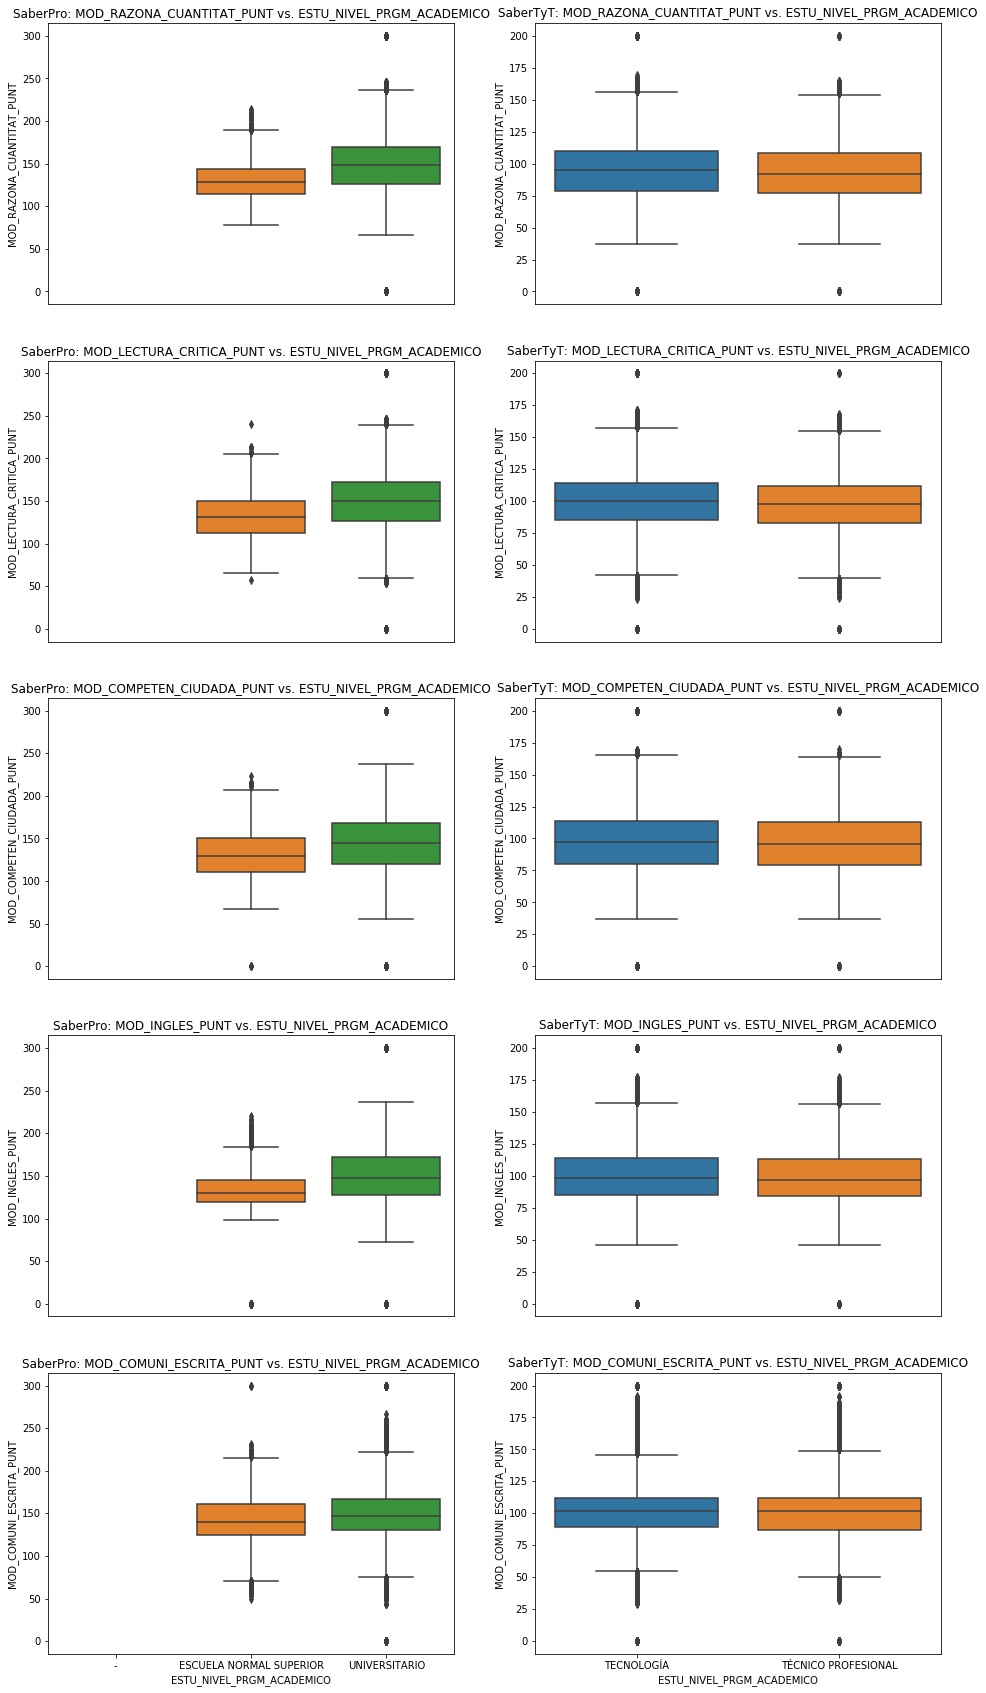

In [19]:
punt_cols=['MOD_RAZONA_CUANTITAT_PUNT',
           'MOD_LECTURA_CRITICA_PUNT',
           'MOD_COMPETEN_CIUDADA_PUNT',
           'MOD_INGLES_PUNT', 
           'MOD_COMUNI_ESCRITA_PUNT',]

var = 'ESTU_NIVEL_PRGM_ACADEMICO'

plt.figure(figsize=(16,6*5));
for i, mod in enumerate(punt_cols, 1):
    a1=plt.subplot(5,2,i*2 - 1)
    plt.title('SaberPro: '+ mod + ' vs. ' + var);
    sns.boxplot(x=var, y=mod, data=df_ies[df_ies["PRUEBA"]=='SaberPro'].sort_values(by=var));
    #a1.subplots_adjuts(wspace=1, hspace=0.5)
    if i != 5:
            a1.get_xaxis().set_visible(False)
        
    a2=plt.subplot(5,2,i*2)
    plt.title('SaberTyT: '+ mod + ' vs. ' + var);
    sns.boxplot(x=var, y=mod, data=df_ies[df_ies["PRUEBA"]=='SaberTyT'].sort_values(by=var)); 
    #subplots_adjuts(wspace=1, hspace=0.5)
    #a2.subplots_adjuts(wspace=1, hspace=0.5)
    if i != 5:
        a2.get_xaxis().set_visible(False)

In [20]:
df_ies[df_ies["PRUEBA"]=='SaberPro']['ESTU_NIVEL_PRGM_ACADEMICO'].value_counts()

UNIVERSITARIO              982648
ESCUELA NORMAL SUPERIOR      3414
-                              28
Name: ESTU_NIVEL_PRGM_ACADEMICO, dtype: int64

In [21]:
df_ies[df_ies["PRUEBA"]=='SaberTyT']['ESTU_NIVEL_PRGM_ACADEMICO'].value_counts()

TECNOLOGÍA             547620
TÉCNICO PROFESIONAL    102205
Name: ESTU_NIVEL_PRGM_ACADEMICO, dtype: int64

In [22]:
df_ies[df_ies["PRUEBA"]=='SaberTyT']['ESTU_NIVEL_PRGM_ACADEMICO'].value_counts(normalize=True)*100

TECNOLOGÍA             84.271919
TÉCNICO PROFESIONAL    15.728081
Name: ESTU_NIVEL_PRGM_ACADEMICO, dtype: float64

**Observación**
Escuela Normal Superior es un 0.35% del total de la prueba Saber.

En TyT No se observa una diferencia entre resultados de ESTU_NIVEL_PRGM_ACADEMICO Tecnología (84.3%)y Técnico Profesional (15.7%)

In [23]:
df_ies['ESTU_METODO_PRGM']=df_ies.ESTU_METODO_PRGM.replace('DISTANCIA VITUAL', 'DISTANCIA VIRTUAL')

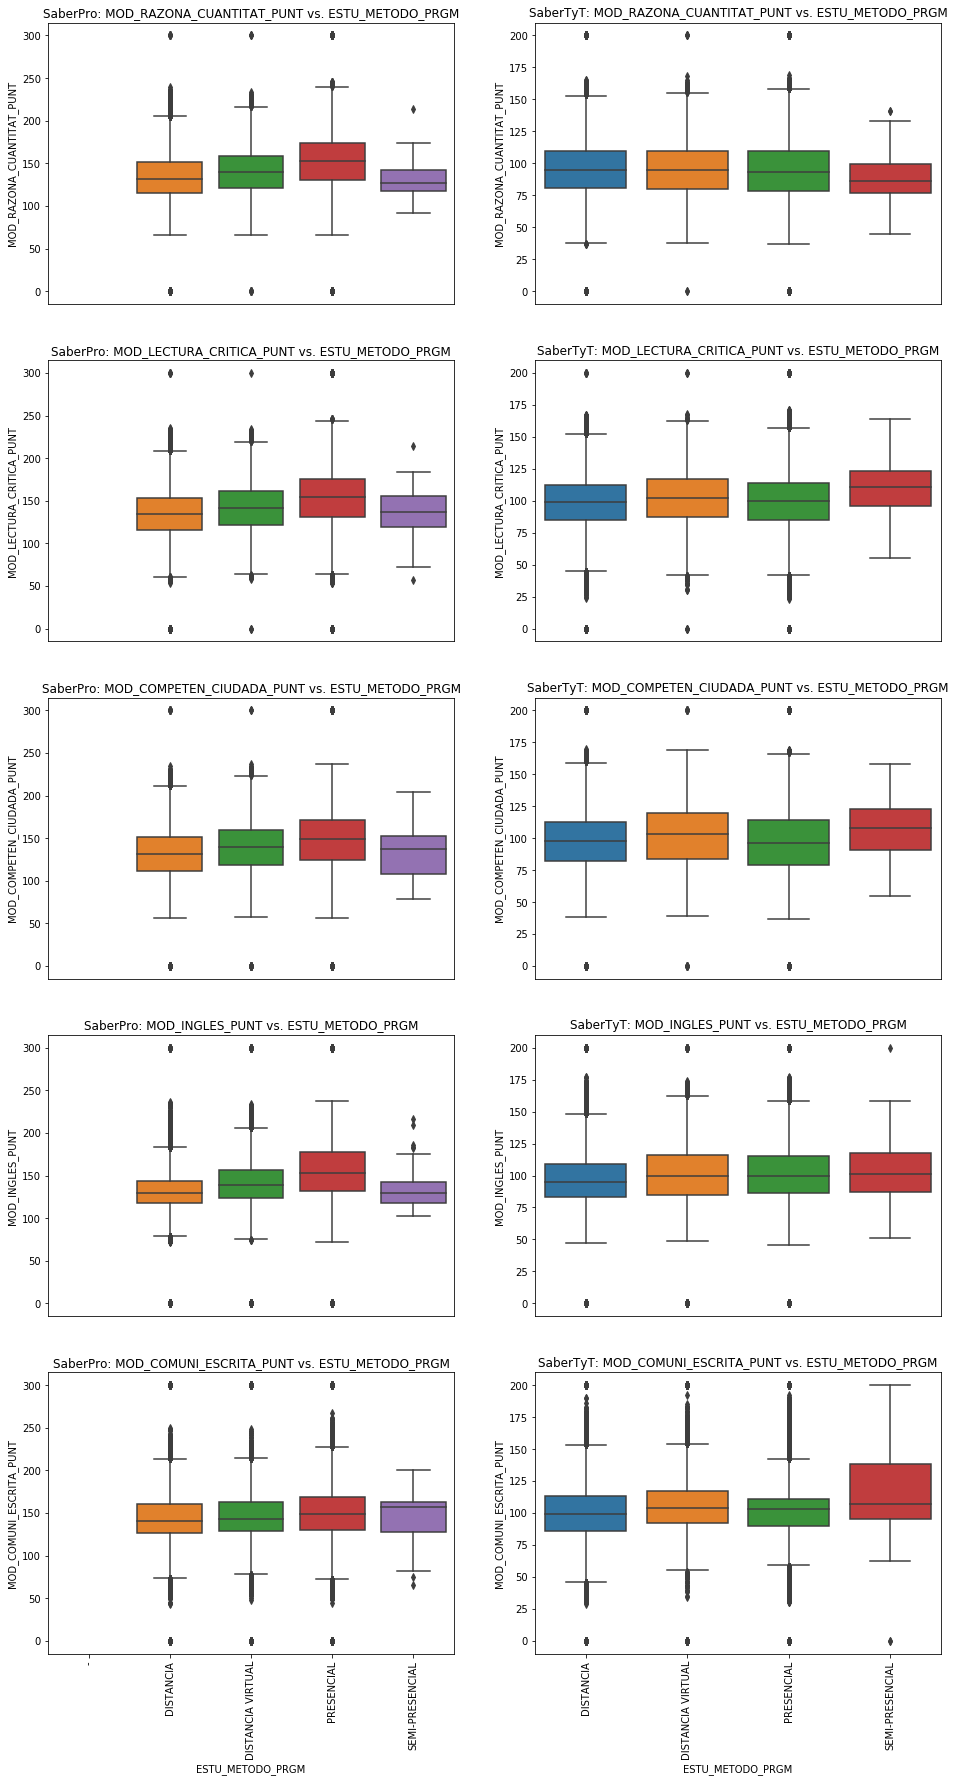

In [24]:
punt_cols=['MOD_RAZONA_CUANTITAT_PUNT',
           'MOD_LECTURA_CRITICA_PUNT',
           'MOD_COMPETEN_CIUDADA_PUNT',
           'MOD_INGLES_PUNT', 
           'MOD_COMUNI_ESCRITA_PUNT',]

var = 'ESTU_METODO_PRGM'

plt.figure(figsize=(16,6*5));
for i, mod in enumerate(punt_cols, 1):
    a1=plt.subplot(5,2,i*2 - 1)
    plt.title('SaberPro: '+ mod + ' vs. ' + var);
    sns.boxplot(x=var, y=mod, data=df_ies[df_ies["PRUEBA"]=='SaberPro'].sort_values(by=var));
    plt.xticks(rotation=90);
    #a1.subplots_adjuts(wspace=1, hspace=0.5)
    
    if i != 5:
        a1.get_xaxis().set_visible(False)
        
    a2=plt.subplot(5,2,i*2)
    plt.title('SaberTyT: '+ mod + ' vs. ' + var);
    sns.boxplot(x=var, y=mod, data=df_ies[df_ies["PRUEBA"]=='SaberTyT'].sort_values(by=var)); 
    plt.xticks(rotation=90);
    #subplots_adjuts(wspace=1, hspace=0.5)
    #a2.subplots_adjuts(wspace=1, hspace=0.5)
    if i != 5:
        a2.get_xaxis().set_visible(False)

In [25]:
df_ies[df_ies["PRUEBA"]=='SaberPro']['ESTU_METODO_PRGM'].value_counts()

PRESENCIAL           777083
DISTANCIA            171136
DISTANCIA VIRTUAL     37770
SEMI-PRESENCIAL          73
-                        28
Name: ESTU_METODO_PRGM, dtype: int64

In [26]:
df_ies[df_ies["PRUEBA"]=='SaberPro']['ESTU_METODO_PRGM'].value_counts(normalize=True)*100

PRESENCIAL           78.804470
DISTANCIA            17.355008
DISTANCIA VIRTUAL     3.830279
SEMI-PRESENCIAL       0.007403
-                     0.002839
Name: ESTU_METODO_PRGM, dtype: float64

In [27]:
df_ies[df_ies["PRUEBA"]=='SaberTyT']['ESTU_METODO_PRGM'].value_counts()

PRESENCIAL           428935
DISTANCIA            200801
DISTANCIA VIRTUAL     19971
SEMI-PRESENCIAL         118
Name: ESTU_METODO_PRGM, dtype: int64

In [28]:
df_ies[df_ies["PRUEBA"]=='SaberTyT']['ESTU_METODO_PRGM'].value_counts(normalize=True)*100

PRESENCIAL           66.007771
DISTANCIA            30.900781
DISTANCIA VIRTUAL     3.073289
SEMI-PRESENCIAL       0.018159
Name: ESTU_METODO_PRGM, dtype: float64

**Observación**
En Pro se observa un mejor desempeño de Presencial (79%) con las restantes modalidades de distancia. Principalmente en Inglés se observa mayor diferencia, mientras que en la única de las 5 que no se observa una diferencia entre las distintas modalidades es Comunicación Escrita.

En TyT no hay diferencia entre los resultados entre Presencial(66%) y las restantes modalidades de distancia

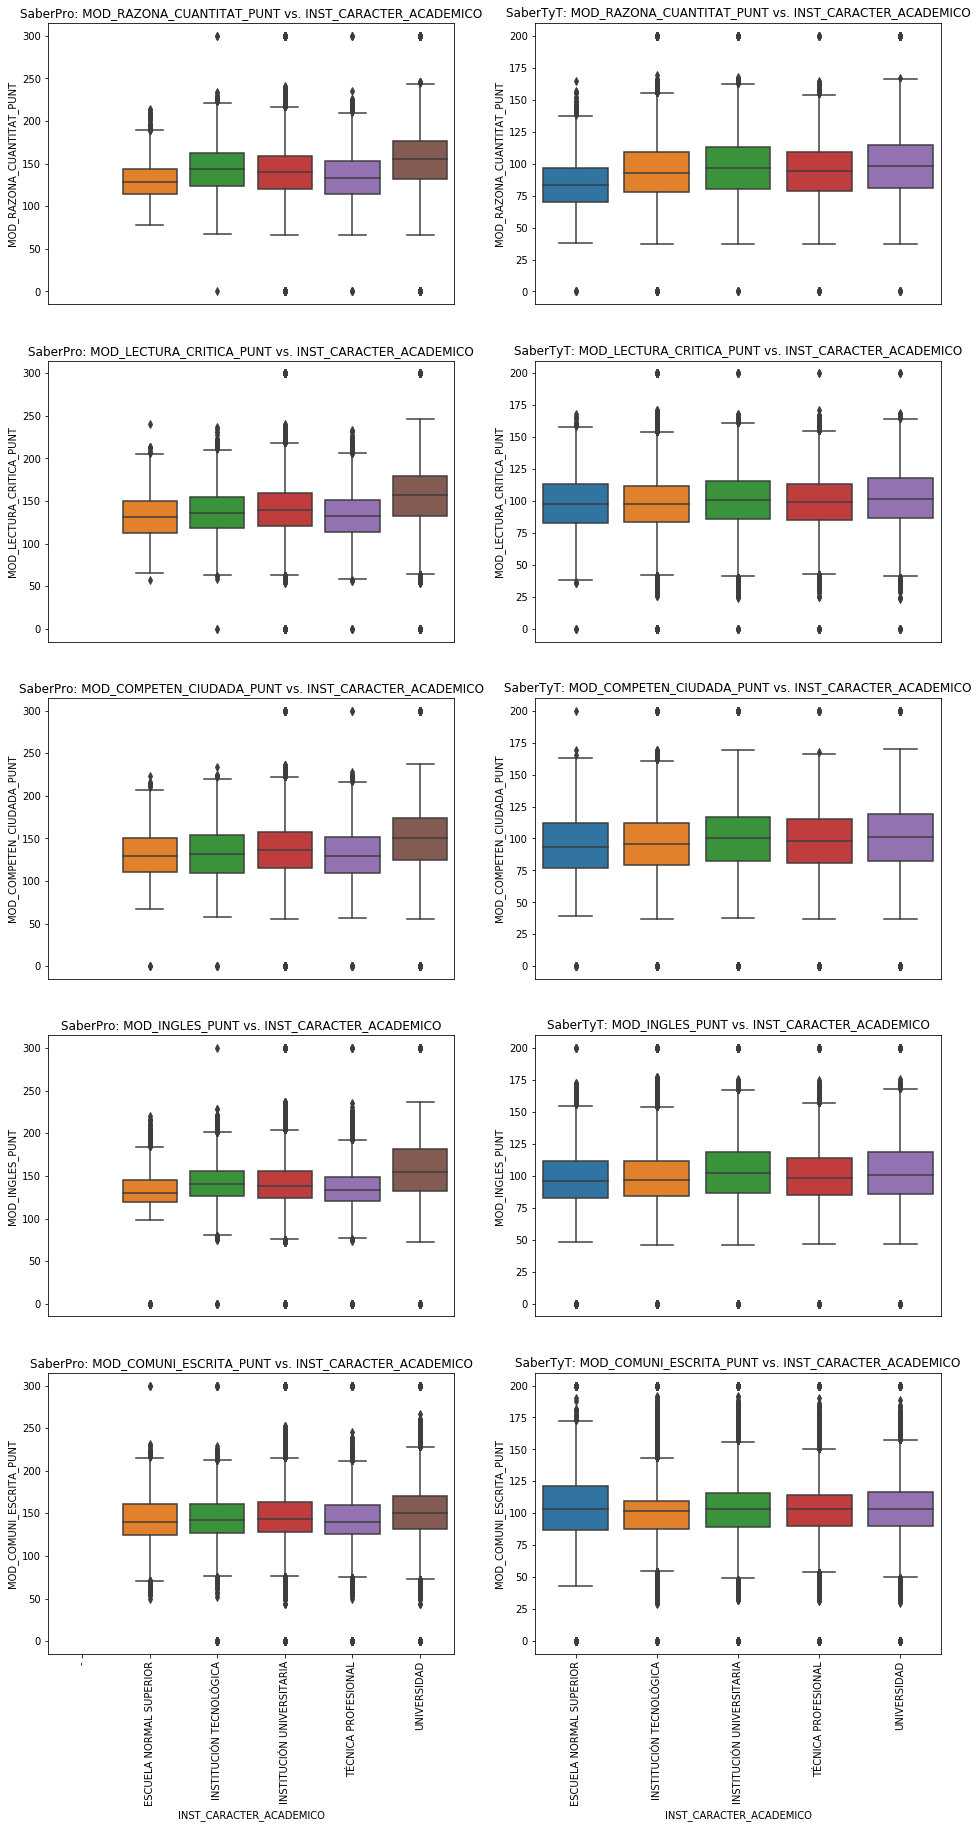

In [29]:
punt_cols=['MOD_RAZONA_CUANTITAT_PUNT',
           'MOD_LECTURA_CRITICA_PUNT',
           'MOD_COMPETEN_CIUDADA_PUNT',
           'MOD_INGLES_PUNT', 
           'MOD_COMUNI_ESCRITA_PUNT',]

var = 'INST_CARACTER_ACADEMICO'

plt.figure(figsize=(16,6*5));
for i, mod in enumerate(punt_cols, 1):
    a1=plt.subplot(5,2,i*2 - 1)
    plt.title('SaberPro: '+ mod + ' vs. ' + var);
    sns.boxplot(x=var, y=mod, data=df_ies[df_ies["PRUEBA"]=='SaberPro'].sort_values(by=var));
    plt.xticks(rotation=90);
    #a1.subplots_adjuts(wspace=1, hspace=0.5)
    
    if i != 5:
        a1.get_xaxis().set_visible(False)
        
    a2=plt.subplot(5,2,i*2)
    plt.title('SaberTyT: '+ mod + ' vs. ' + var);
    sns.boxplot(x=var, y=mod, data=df_ies[df_ies["PRUEBA"]=='SaberTyT'].sort_values(by=var)); 
    plt.xticks(rotation=90);
    #subplots_adjuts(wspace=1, hspace=0.5)
    #a2.subplots_adjuts(wspace=1, hspace=0.5)
    if i != 5:
        a2.get_xaxis().set_visible(False)

In [30]:
df_ies[df_ies["PRUEBA"]=='SaberPro']['INST_CARACTER_ACADEMICO'].value_counts()

UNIVERSIDAD                  608435
INSTITUCIÓN UNIVERSITARIA    340598
TÉCNICA PROFESIONAL           22937
INSTITUCIÓN TECNOLÓGICA       10678
ESCUELA NORMAL SUPERIOR        3414
-                                28
Name: INST_CARACTER_ACADEMICO, dtype: int64

In [31]:
df_ies[df_ies["PRUEBA"]=='SaberPro']['INST_CARACTER_ACADEMICO'].value_counts(normalize=True)*100

UNIVERSIDAD                  61.701772
INSTITUCIÓN UNIVERSITARIA    34.540255
TÉCNICA PROFESIONAL           2.326055
INSTITUCIÓN TECNOLÓGICA       1.082863
ESCUELA NORMAL SUPERIOR       0.346216
-                             0.002839
Name: INST_CARACTER_ACADEMICO, dtype: float64

In [32]:
df_ies[df_ies["PRUEBA"]=='SaberTyT']['INST_CARACTER_ACADEMICO'].value_counts()

INSTITUCIÓN TECNOLÓGICA      408149
INSTITUCIÓN UNIVERSITARIA    101333
TÉCNICA PROFESIONAL           67832
UNIVERSIDAD                   64183
ESCUELA NORMAL SUPERIOR        8328
Name: INST_CARACTER_ACADEMICO, dtype: int64

In [33]:
df_ies[df_ies["PRUEBA"]=='SaberTyT']['INST_CARACTER_ACADEMICO'].value_counts(normalize=True)*100

INSTITUCIÓN TECNOLÓGICA      62.809064
INSTITUCIÓN UNIVERSITARIA    15.593891
TÉCNICA PROFESIONAL          10.438503
UNIVERSIDAD                   9.876967
ESCUELA NORMAL SUPERIOR       1.281576
Name: INST_CARACTER_ACADEMICO, dtype: float64

**Observación**
En PRO se observa que INST_CARACTER_ACADEMICO tipo Universidad (61.7% del total)presenta mejor desempeño que el resto de tipo de Instituciones (institución Universitaria 34.5% y otras). Su mediana se ubica en el percentil 75% de los otros tipos de Instituciones, con excepción de Comunicación Escrita donde la diferencia no es tan evidente.

En TyT la INS_CARACTER_ACADEMICO de mayor proporción Institución Tecnologica (62.8%) presenta un comportamiento muy similar al de Técnica Profesional (10.4%), mientras que Institución Universitaria (15.6%) lo presenta con Universidad (9.8%). Este segundo grupo presenta un leve mejor desempeño que el primero.

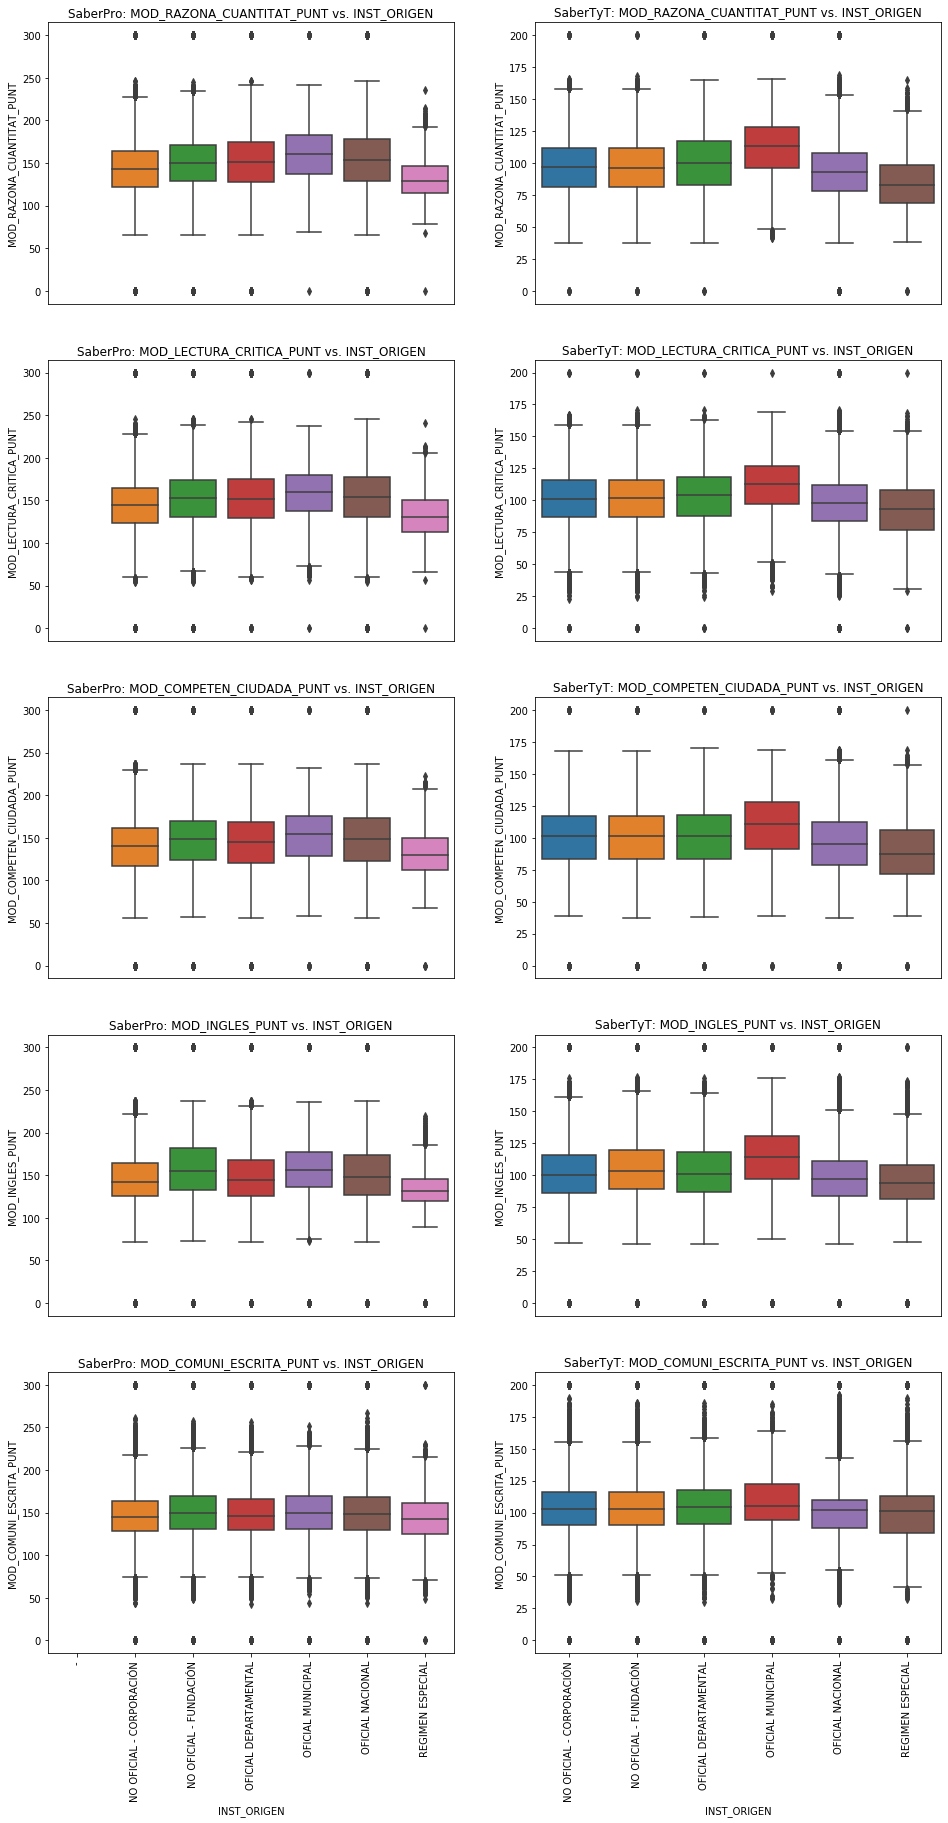

In [34]:
punt_cols=['MOD_RAZONA_CUANTITAT_PUNT',
           'MOD_LECTURA_CRITICA_PUNT',
           'MOD_COMPETEN_CIUDADA_PUNT',
           'MOD_INGLES_PUNT', 
           'MOD_COMUNI_ESCRITA_PUNT',]

var = 'INST_ORIGEN'

plt.figure(figsize=(16,6*5));
for i, mod in enumerate(punt_cols, 1):
    a1=plt.subplot(5,2,i*2 - 1)
    plt.title('SaberPro: '+ mod + ' vs. ' + var);
    sns.boxplot(x=var, y=mod, data=df_ies[df_ies["PRUEBA"]=='SaberPro'].sort_values(by=var));
    plt.xticks(rotation=90);
    #a1.subplots_adjuts(wspace=1, hspace=0.5)
    
    if i != 5:
        a1.get_xaxis().set_visible(False)
        
    a2=plt.subplot(5,2,i*2)
    plt.title('SaberTyT: '+ mod + ' vs. ' + var);
    sns.boxplot(x=var, y=mod, data=df_ies[df_ies["PRUEBA"]=='SaberTyT'].sort_values(by=var)); 
    plt.xticks(rotation=90);
    #subplots_adjuts(wspace=1, hspace=0.5)
    #a2.subplots_adjuts(wspace=1, hspace=0.5)
    if i != 5:
        a2.get_xaxis().set_visible(False)

In [35]:
df_ies[df_ies["PRUEBA"]=='SaberPro']['INST_ORIGEN'].value_counts()

NO OFICIAL - CORPORACIÓN    355428
NO OFICIAL - FUNDACIÓN      294989
OFICIAL DEPARTAMENTAL       159201
OFICIAL NACIONAL            151969
OFICIAL MUNICIPAL            20804
REGIMEN ESPECIAL              3671
-                               28
Name: INST_ORIGEN, dtype: int64

In [36]:
df_ies[df_ies["PRUEBA"]=='SaberPro']['INST_ORIGEN'].value_counts(normalize=True)*100

NO OFICIAL - CORPORACIÓN    36.044174
NO OFICIAL - FUNDACIÓN      29.915018
OFICIAL DEPARTAMENTAL       16.144672
OFICIAL NACIONAL            15.411271
OFICIAL MUNICIPAL            2.109747
REGIMEN ESPECIAL             0.372278
-                            0.002839
Name: INST_ORIGEN, dtype: float64

In [37]:
df_ies[df_ies["PRUEBA"]=='SaberTyT']['INST_ORIGEN'].value_counts()

OFICIAL NACIONAL            414207
NO OFICIAL - FUNDACIÓN       86566
NO OFICIAL - CORPORACIÓN     85436
OFICIAL DEPARTAMENTAL        36600
REGIMEN ESPECIAL             15217
OFICIAL MUNICIPAL            11799
Name: INST_ORIGEN, dtype: int64

In [38]:
df_ies[df_ies["PRUEBA"]=='SaberTyT']['INST_ORIGEN'].value_counts(normalize=True) * 100

OFICIAL NACIONAL            63.741315
NO OFICIAL - FUNDACIÓN      13.321433
NO OFICIAL - CORPORACIÓN    13.147540
OFICIAL DEPARTAMENTAL        5.632286
REGIMEN ESPECIAL             2.341707
OFICIAL MUNICIPAL            1.815720
Name: INST_ORIGEN, dtype: float64

**Observación**
986090
En PRO No oficial Fundación (30%) se ve mejor que No Oficial Corporación (36%) (Esperado) con mayor diferencia en Inglés. Oficial Departamental (16.1%) presenta casi igual comportamiento que No Oficial Fundación con excepción de Inglés. Oficial Nacional (15.4%) y Oficial Municipal (2.1%) presentan el mejor desempeño con excepción de Inglés donde la mejor es No Oficial Fundación y en Comunicación Escrita donde todos son muy parejos

En TyT la Naturaleza de la IES que más proporción tiene es Oficial Nacional (63,7%) levemente menor al resto de IES, principalmente en Comunicación Escrita. Las No Oficiales y Oficial departamental presentan un comportamiento muy similar. La oficial Municipal (1.8%) presenta un comportamiento un poco superior al resto (Averiguar cuáles son)

In [42]:
df_fin['MOD_COMUNI_ESCRITA_PUNT'] = df_fin['MOD_COMUNI_ESCRITA_PUNT'].replace({'.': ''})
df_fin["MOD_COMUNI_ESCRITA_PUNT"] = pd.to_numeric(df_fin["MOD_COMUNI_ESCRITA_PUNT"])


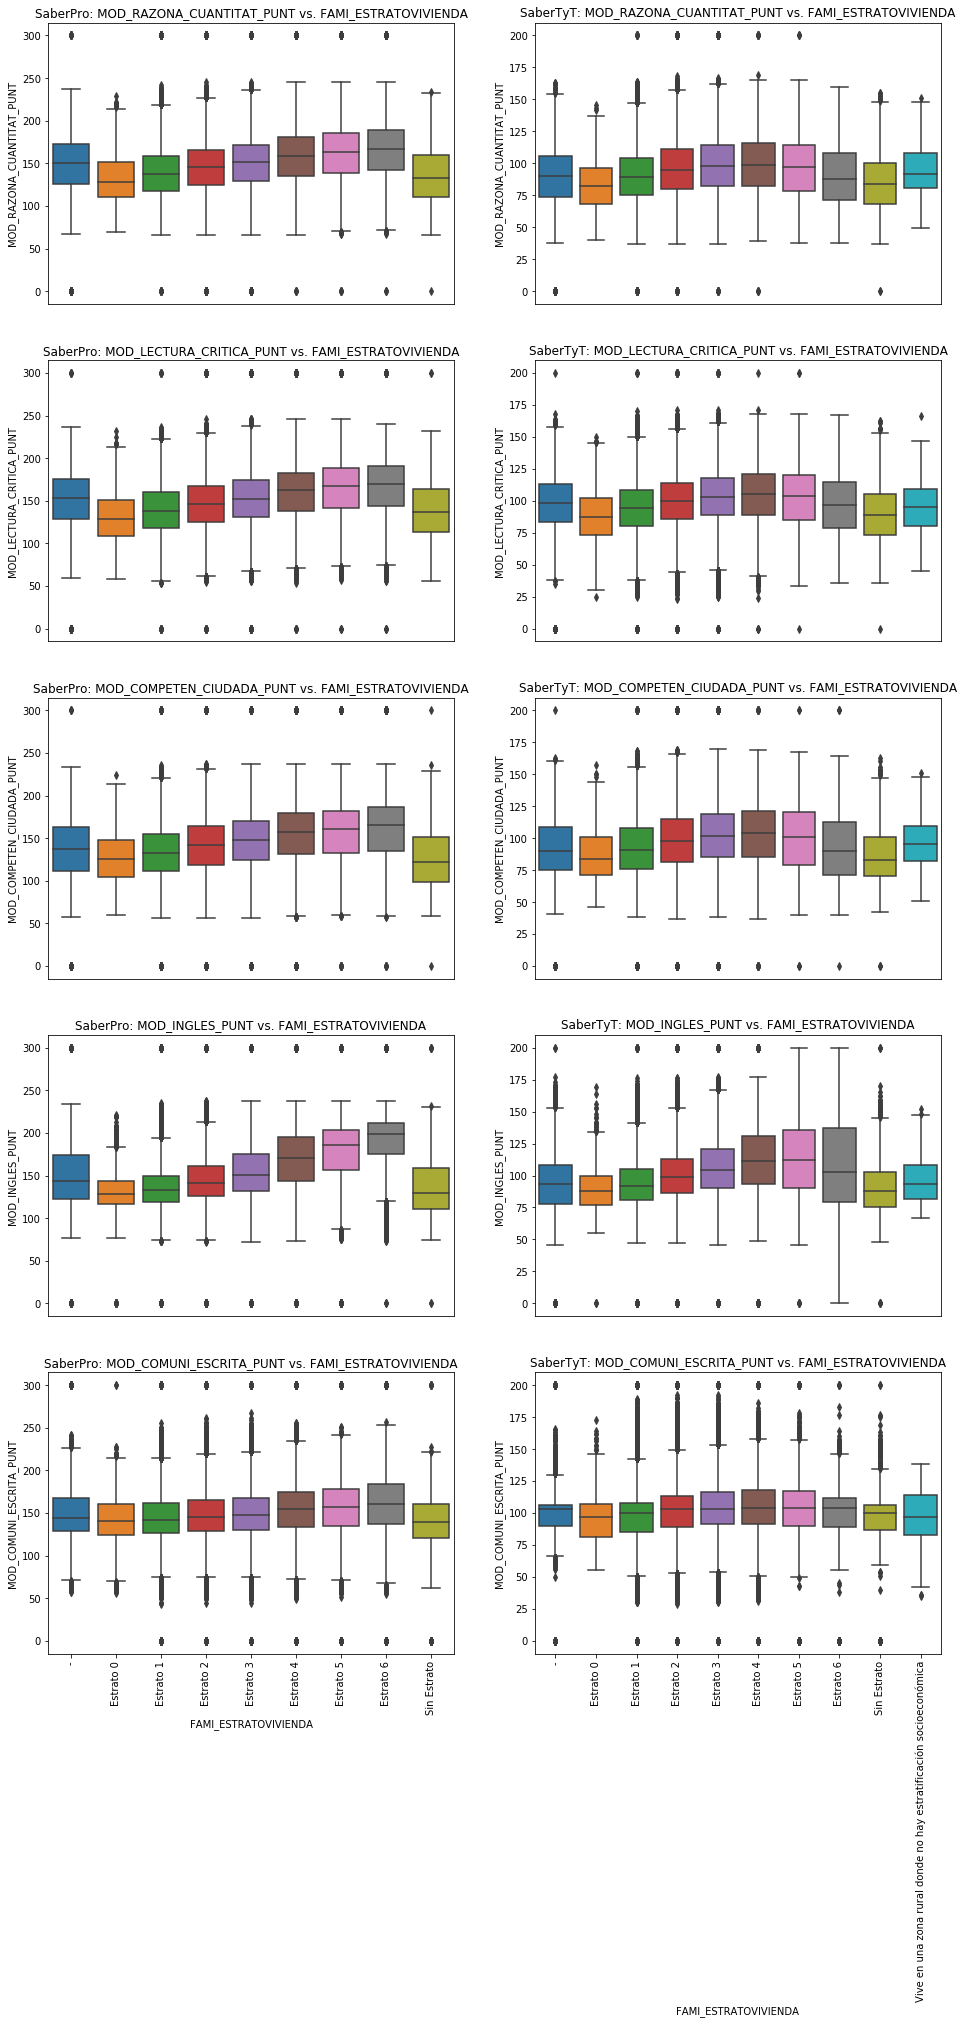

In [43]:
punt_cols=['MOD_RAZONA_CUANTITAT_PUNT',
           'MOD_LECTURA_CRITICA_PUNT',
           'MOD_COMPETEN_CIUDADA_PUNT',
           'MOD_INGLES_PUNT', 
           'MOD_COMUNI_ESCRITA_PUNT',]

var = 'FAMI_ESTRATOVIVIENDA'

plt.figure(figsize=(16,6*5));
for i, mod in enumerate(punt_cols, 1):
    a1=plt.subplot(5,2,i*2 - 1)
    plt.title('SaberPro: '+ mod + ' vs. ' + var);
    sns.boxplot(x=var, y=mod, data=df_fin[df_fin["PRUEBA"]=='SaberPro'].sort_values(by=var));
    plt.xticks(rotation=90);
    #a1.subplots_adjuts(wspace=1, hspace=0.5)
    
    if i != 5:
        a1.get_xaxis().set_visible(False)
        
    a2=plt.subplot(5,2,i*2)
    plt.title('SaberTyT: '+ mod + ' vs. ' + var);
    sns.boxplot(x=var, y=mod, data=df_fin[df_fin["PRUEBA"]=='SaberTyT'].sort_values(by=var)); 
    plt.xticks(rotation=90);
    #subplots_adjuts(wspace=1, hspace=0.5)
    #a2.subplots_adjuts(wspace=1, hspace=0.5)
    if i != 5:
        a2.get_xaxis().set_visible(False)

In [39]:
df_fin[df_fin["PRUEBA"]=='SaberPro']['FAMI_ESTRATOVIVIENDA'].value_counts()

Estrato 2      325425
Estrato 3      320135
Estrato 1      142858
Estrato 4      102933
Estrato 5       36393
Estrato 6       18964
-               18384
Sin Estrato      2939
Estrato 0        1692
Name: FAMI_ESTRATOVIVIENDA, dtype: int64

In [40]:
df_fin[df_fin["PRUEBA"]=='SaberPro']['FAMI_ESTRATOVIVIENDA'].value_counts(normalize=True) * 100

Estrato 2      33.558552
Estrato 3      33.013036
Estrato 1      14.731836
Estrato 4      10.614681
Estrato 5       3.752927
Estrato 6       1.955610
-               1.895799
Sin Estrato     0.303076
Estrato 0       0.174483
Name: FAMI_ESTRATOVIVIENDA, dtype: float64

In [44]:
df_fin[df_fin["PRUEBA"]=='SaberTyT']['FAMI_ESTRATOVIVIENDA'].value_counts()

Estrato 2                                                             279617
Estrato 1                                                             175129
Estrato 3                                                             154809
Estrato 4                                                              17825
-                                                                       9626
Estrato 5                                                               3723
Sin Estrato                                                             2234
Estrato 6                                                               1290
Estrato 0                                                               1099
Vive en una zona rural donde no hay estratificación socioeconómica       176
Name: FAMI_ESTRATOVIVIENDA, dtype: int64

In [45]:
df_fin[df_fin["PRUEBA"]=='SaberTyT']['FAMI_ESTRATOVIVIENDA'].value_counts(normalize=True) * 100

Estrato 2                                                             43.316014
Estrato 1                                                             27.129575
Estrato 3                                                             23.981764
Estrato 4                                                              2.761305
-                                                                      1.491182
Estrato 5                                                              0.576737
Sin Estrato                                                            0.346073
Estrato 6                                                              0.199836
Estrato 0                                                              0.170248
Vive en una zona rural donde no hay estratificación socioeconómica     0.027265
Name: FAMI_ESTRATOVIVIENDA, dtype: float64

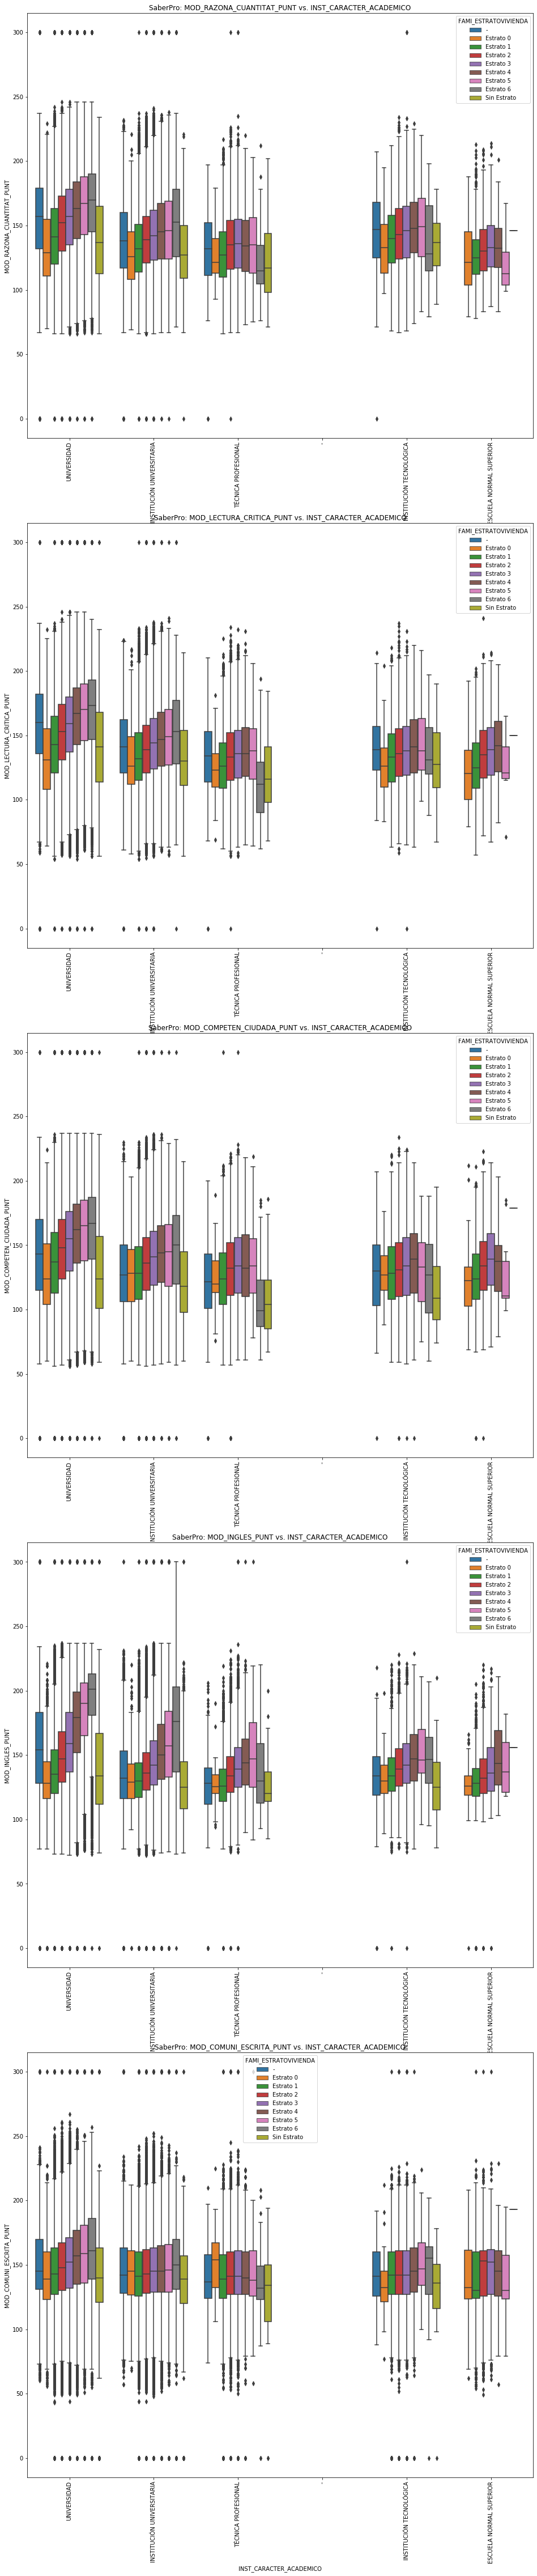

In [59]:
punt_cols=['MOD_RAZONA_CUANTITAT_PUNT',
           'MOD_LECTURA_CRITICA_PUNT',
           'MOD_COMPETEN_CIUDADA_PUNT',
           'MOD_INGLES_PUNT', 
           'MOD_COMUNI_ESCRITA_PUNT',]

var = 'INST_CARACTER_ACADEMICO'

plt.figure(figsize=(16,16*5));
for i, mod in enumerate(punt_cols, 1):
    a1=plt.subplot(5,1,i)
    plt.title('SaberPro: '+ mod + ' vs. ' + var);
    sns.boxplot(x=var, y=mod, hue='FAMI_ESTRATOVIVIENDA', data=df_fin[df_fin["PRUEBA"]=='SaberPro'].sort_values(by='FAMI_ESTRATOVIVIENDA'));
    plt.xticks(rotation=90);
    #a1.subplots_adjuts(wspace=1, hspace=0.5)
    
    #if i != 5:
     #   a1.get_xaxis().set_visible(False)
      
    

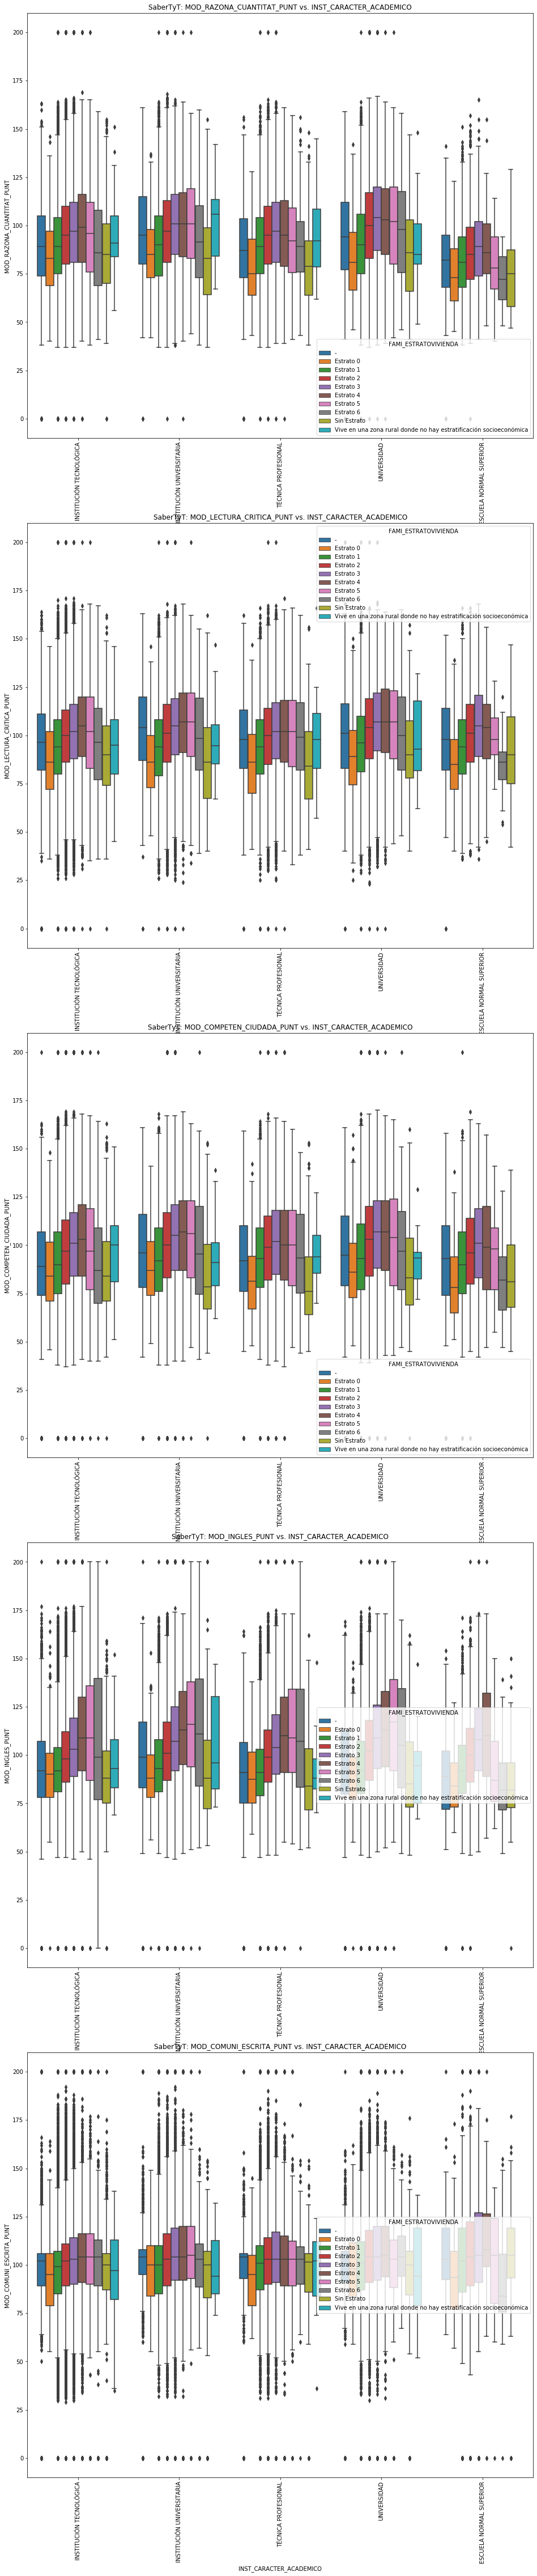

In [61]:
punt_cols=['MOD_RAZONA_CUANTITAT_PUNT',
           'MOD_LECTURA_CRITICA_PUNT',
           'MOD_COMPETEN_CIUDADA_PUNT',
           'MOD_INGLES_PUNT', 
           'MOD_COMUNI_ESCRITA_PUNT',]

var = 'INST_CARACTER_ACADEMICO'

plt.figure(figsize=(16,16*5));
for i, mod in enumerate(punt_cols, 1):      
    a2=plt.subplot(5,1,i)
    plt.title('SaberTyT: '+ mod + ' vs. ' + var);
    sns.boxplot(x=var, y=mod, hue='FAMI_ESTRATOVIVIENDA', data=df_fin[df_fin["PRUEBA"]=='SaberTyT'].sort_values(by='FAMI_ESTRATOVIVIENDA')); 
    plt.xticks(rotation=90);
    
    #if i != 5:
      #  a2.get_xaxis().set_visible(False)

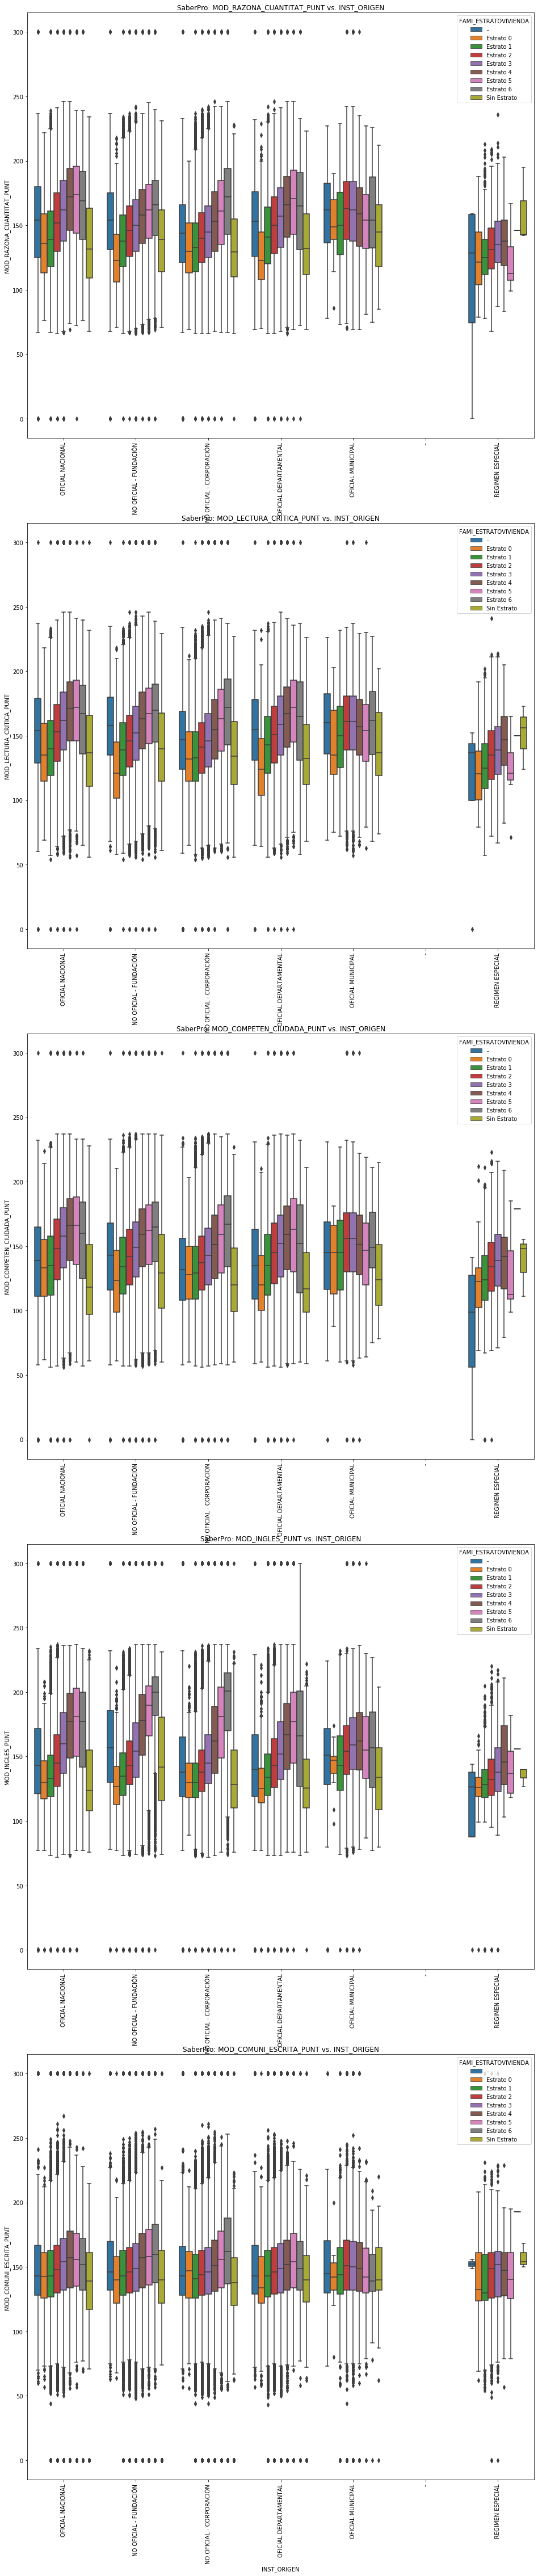

In [62]:
punt_cols=['MOD_RAZONA_CUANTITAT_PUNT',
           'MOD_LECTURA_CRITICA_PUNT',
           'MOD_COMPETEN_CIUDADA_PUNT',
           'MOD_INGLES_PUNT', 
           'MOD_COMUNI_ESCRITA_PUNT',]

var = 'INST_ORIGEN'

plt.figure(figsize=(16,16*5));
for i, mod in enumerate(punt_cols, 1):
    a1=plt.subplot(5,1,i)
    plt.title('SaberPro: '+ mod + ' vs. ' + var);
    sns.boxplot(x=var, y=mod, hue='FAMI_ESTRATOVIVIENDA', data=df_fin[df_fin["PRUEBA"]=='SaberPro'].sort_values(by='FAMI_ESTRATOVIVIENDA'));
    plt.xticks(rotation=90);
    #a1.subplots_adjuts(wspace=1, hspace=0.5)
    
    #if i != 5:
     #   a1.get_xaxis().set_visible(False)

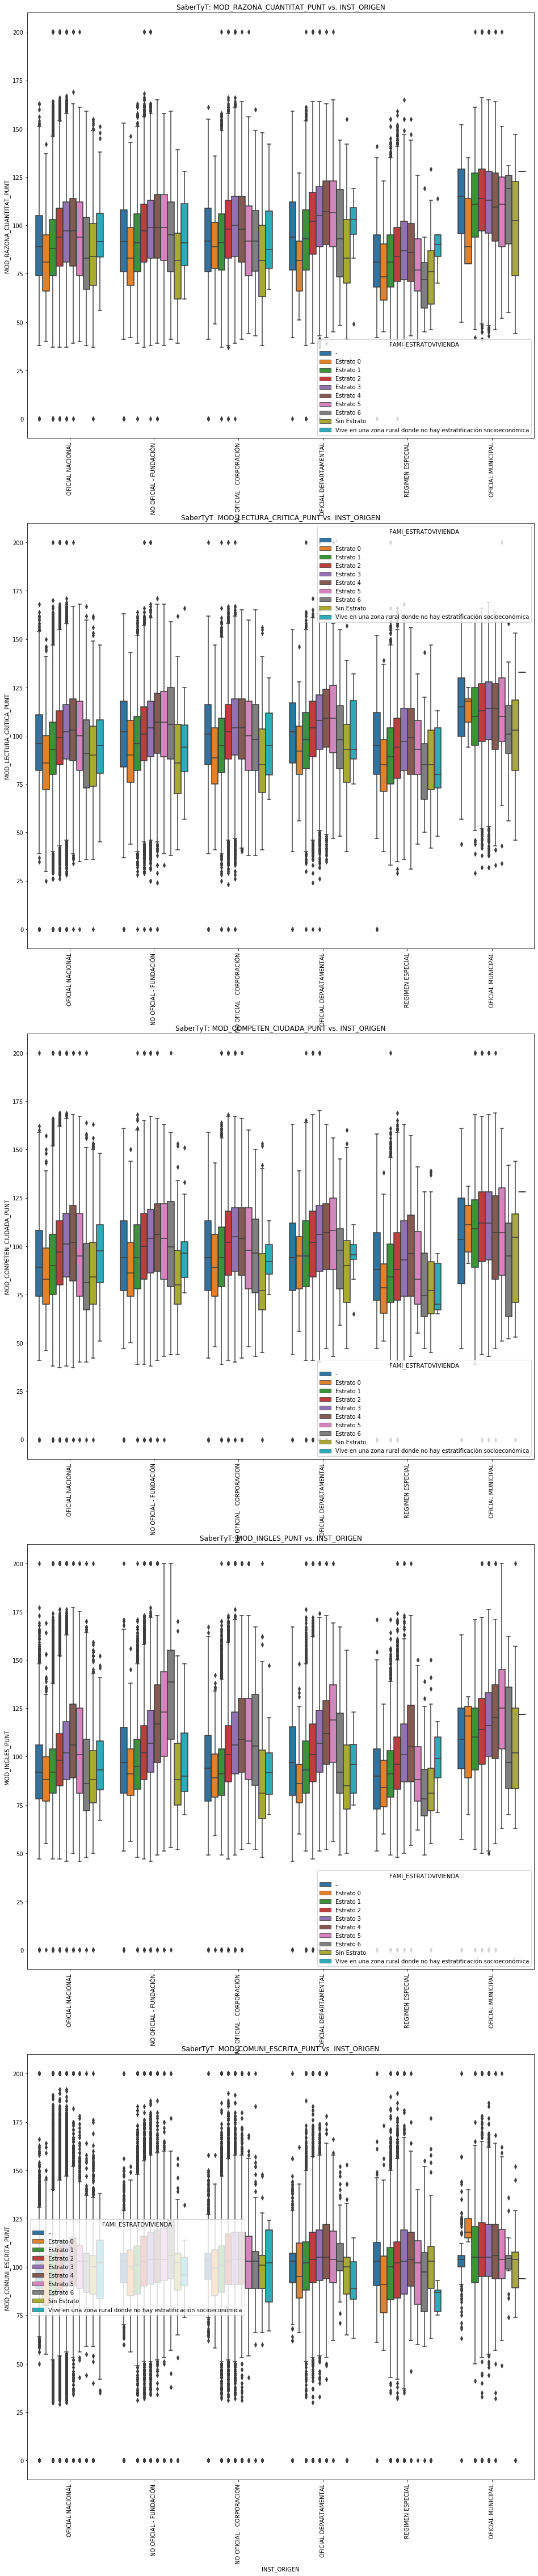

In [63]:
punt_cols=['MOD_RAZONA_CUANTITAT_PUNT',
           'MOD_LECTURA_CRITICA_PUNT',
           'MOD_COMPETEN_CIUDADA_PUNT',
           'MOD_INGLES_PUNT', 
           'MOD_COMUNI_ESCRITA_PUNT',]

var = 'INST_ORIGEN'

plt.figure(figsize=(16,16*5));
for i, mod in enumerate(punt_cols, 1):
    a1=plt.subplot(5,1,i)
    plt.title('SaberTyT: '+ mod + ' vs. ' + var);
    sns.boxplot(x=var, y=mod, hue='FAMI_ESTRATOVIVIENDA', data=df_fin[df_fin["PRUEBA"]=='SaberTyT'].sort_values(by='FAMI_ESTRATOVIVIENDA'));
    plt.xticks(rotation=90);
    #a1.subplots_adjuts(wspace=1, hspace=0.5)
    
    #if i != 5:
     #   a1.get_xaxis().set_visible(False)